In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [54]:
def calculate_coverage_index(dataframe, technology_columns, group_by_column):

    for tech in technology_columns:
        dataframe[f'{tech} Access'] = dataframe[tech] == 'SI'
    coverage = dataframe.groupby(group_by_column)[[f'{tech} Access' for tech in technology_columns]].mean() * 100

    coverage_df = coverage.reset_index()
    coverage_df.columns = [group_by_column] + [f'{tech} Coverage (%)' for tech in technology_columns]

    return coverage_df

In [55]:
file_path = 'C:/PI2/datasets/mapa_conectividad.xlsx'  
excel_data = pd.ExcelFile(file_path)
data = excel_data.parse("Hoja3")

In [56]:
advanced_technologies = ['Fibra óptica', '4G']
group_column = 'Provincia'


In [57]:
coverage_index_df = calculate_coverage_index(data, advanced_technologies, group_column)

In [58]:
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")
bar_width = 0.7

<Figure size 1400x1000 with 0 Axes>

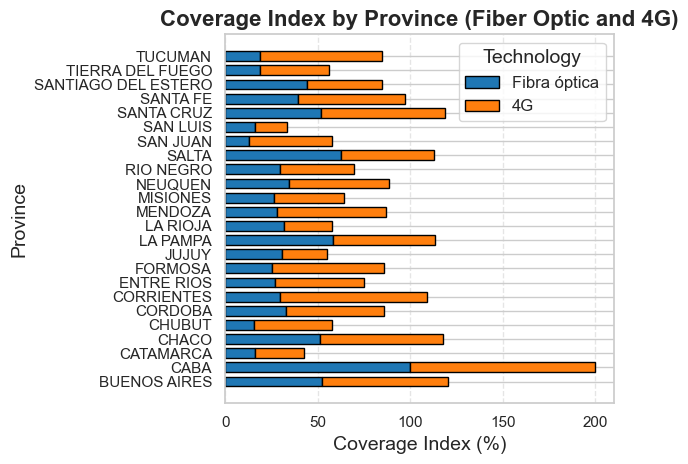

In [60]:
bottom_values = [0] * len(coverage_index_df)
colors = ['#1f77b4', '#ff7f0e']  # Adjusted colors for better visuals
labels = advanced_technologies

for idx, tech in enumerate(advanced_technologies):
    plt.barh(coverage_index_df['Provincia'], coverage_index_df[f'{tech} Coverage (%)'],
             left=bottom_values, color=colors[idx], label=labels[idx], edgecolor='black', height=bar_width)
    bottom_values = [i + j for i, j in zip(bottom_values, coverage_index_df[f'{tech} Coverage (%)'])]

plt.xlabel('Coverage Index (%)', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.title('Coverage Index by Province (Fiber Optic and 4G)', fontsize=16, fontweight='bold')
plt.legend(title='Technology', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




## Puntos a destacar del KPI
* Aquellas provincias que tienen mas del 100% en cobertura se deba quiza a una mayor urbanizacion o cuentan con mayor inversion en infraestructura digital.
* Provincias con un bajo porcentaje de cobertura puediarn ser zonas con una baja urbanizacion o que falte el apoyo de inersion para infraestructura y ampliar dichas tecnologias en cobertura.

# Posibles acciones en base al analisis
* Identificar regiones prioritarias, es decir, en donde es mas urgente expandir las tecnologias avanzadas.
* Analizar qué políticas públicas o inversiones privadas están impulsando el desarrollo tecnológico en provincias con altos índices.
* Proyectos piloto en localidades críticas: Implementar programas de conectividad en localidades con baja población y carencia de tecnologías avanzadas.